# Take an image, shrink it, and filter out the intermediate colors

In [1]:
import cvfunc
import cv2
import scale
import symmetry
from tqdm import tqdm
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from multiprocess import Pool
from time import time
from functools import partial
plt.rcParams['figure.figsize'] = [10, 10]

In [81]:
#Paths
# original_images_path = '/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/originals'
# # for Auburn 2021 images, and if you just want "E" images, filter on first line with: "/*E.png"
original_images_path = '/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/Auburn_2021'

scaled_images_path = "/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink"


In [82]:
# this will shrink the images

for file in tqdm(glob.glob(original_images_path+"/*W.png"),desc="Progress"):
    original = cv2.imread(file)
#     # IF it has the pink border, use this to crop:
#     border_cut = 20
#     original = original[border_cut:original.shape[0]-border_cut, border_cut:original.shape[1]-border_cut]
    resized = scale.resize(original,100) # height, in PX 
#     # if you need to FLIP the image: 
#     resized = np.fliplr(resized)
    # and save the image: 
    savestring = os.path.join(scaled_images_path,f"{os.path.splitext(os.path.basename(file))[0]}.png")
    cv2.imwrite(savestring,resized)


Progress: 100%|██████████| 50/50 [00:36<00:00,  1.38it/s]


In [ ]:
# Load a shrink image:

In [83]:

test = cv2.imread('/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col76/col76_day50_24may2021_E.png')


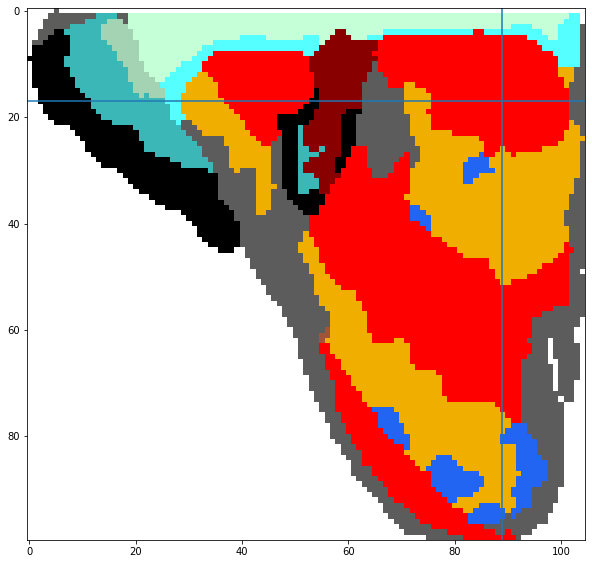

In [84]:
plt.imshow(test)
plt.axvline(89)
plt.axhline(17)

In [90]:
# So... how many colors are in here: 116 colors. So... that's the problem! 
len(cvfunc.get_colors(test)[0])

8

In [64]:
# # this is Y,X: 
# test[17][89]

In [55]:
color_list = [
    [255,255,255],
    [234,173,75],
    [202,253,224],
    [168,209,185],
    [92,92,92],
    [0,0,0],
    [56,109,226]    
]

In [89]:
for file in glob.glob(scaled_images_path+"/col*/*.png"):
    print(file)
    test = cv2.imread(file)
    print(len(cvfunc.get_colors(test)[0]))
    print('---')


/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col62/col62_day170_21September2021_W.png
9
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col62/col62_day190_11October2021_W.png
10
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col62/col62_day200_21October2021_E.png
10
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col62/col62_day159_10September2021_E.png
8
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col62/col62_day221_11November2021_W.png
10
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col62/col62_day170_21September2021_E.png
10
---
/Users/mich

6
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col76/col76_day81_24June2021_W.png
10
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col76/col76_day20_24apr2021_W.png
10
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col76/col76_day141_23August2021_E.png
5
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col76/col76_day81_24June2021_E.png
11
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col76/col76_day120_02August2021_W.png
6
---
/Users/michaelsmith/Library/CloudStorage/Box-Box/2D_symmetry_2021/Annotated/georeferenced_for_roberto_molinari/shrink/col76/col76_day100_13July2021_W.png
7
---
/Users/michaelsmith/Library/Clo